In [5]:
import pandas as pd
import numpy as np

file = "DF_FINAL.xlsx"
df_final = pd.read_excel(file)

# Asegurar que timestamp es datetime
df_final["timestamp"] = pd.to_datetime(df_final["timestamp"])

# Extraer fecha, día de semana y hora
df_final["fecha"] = df_final["timestamp"].dt.date
df_final["dia_semana"] = df_final["timestamp"].dt.day_name(locale="es_ES")  # nombres en español
df_final["hora"] = df_final["timestamp"].dt.hour

dia_semana
Domingo      13036280
Jueves       18310610
Lunes        16835859
Martes       15826070
Miércoles    17481203
Sábado       14995510
Viernes      18536597
dtype: int64


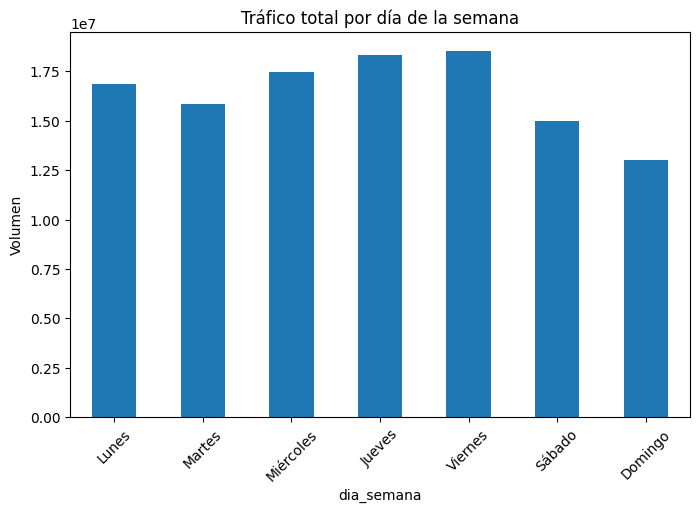

In [12]:
import matplotlib.pyplot as plt

trafico_semana = df_final.drop(columns=["timestamp", "fecha", "hora", "dia_semana"]).sum(axis=1).groupby(df_final["dia_semana"]).sum()
trafico_semana = trafico_semana.reindex(["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"])

trafico_semana.plot(kind="bar", figsize=(8,5))
plt.title("Tráfico total por día de la semana")
plt.ylabel("Volumen")
plt.xticks(rotation=45)
plt.show()

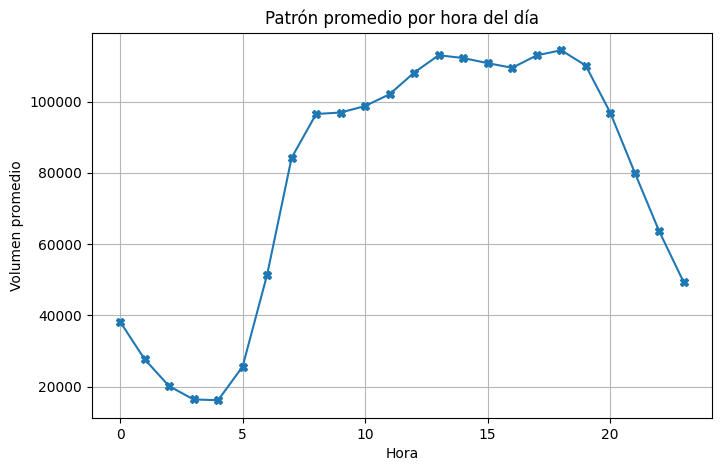

In [19]:
trafico_hora = df_final.drop(columns=["timestamp","fecha","hora","dia_semana"]).sum(axis=1).groupby(df_final["hora"]).mean()

trafico_hora.plot(kind="line", marker="X", figsize=(8,5))
plt.title("Patrón promedio por hora del día")
plt.xlabel("Hora")
plt.ylabel("Volumen promedio")
plt.grid(True, linestyle="-", alpha=0.91)
plt.show()


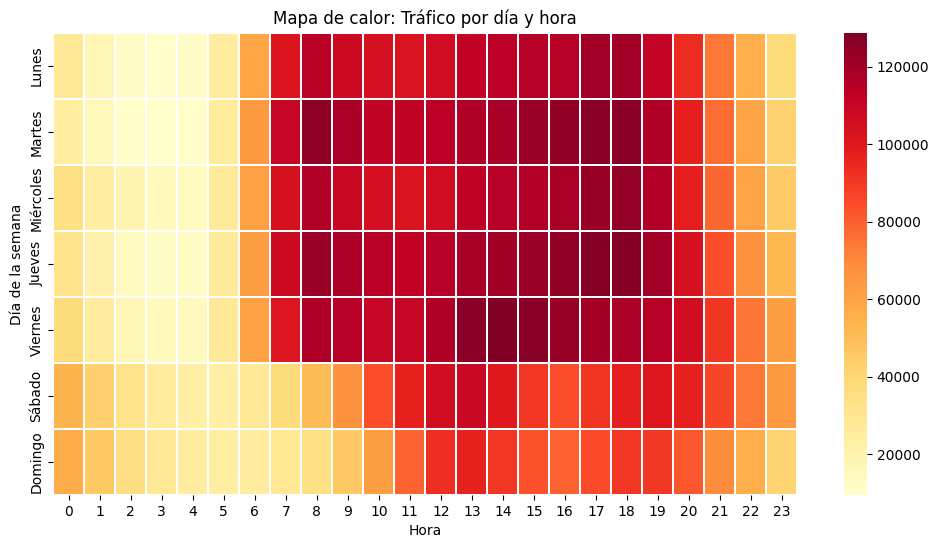

In [24]:
import seaborn as sns

trafico_dia_hora = df_final.drop(columns=["timestamp","fecha","dia_semana","hora"]).sum(axis=1)
pivot = pd.DataFrame({
    "hora": df_final["hora"],
    "dia_semana": df_final["dia_semana"],
    "trafico": trafico_dia_hora
})
tabla = pivot.groupby(["dia_semana","hora"]).mean().reset_index()
# Reordenar días
dias_orden = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]
tabla["dia_semana"] = pd.Categorical(tabla["dia_semana"], categories=dias_orden, ordered=True)

heatmap_data = tabla.pivot(index="dia_semana", columns="hora", values="trafico")
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.3, annot=False)
plt.title("Mapa de calor: Tráfico por día y hora")
plt.ylabel("Día de la semana")
plt.xlabel("Hora")
plt.show()


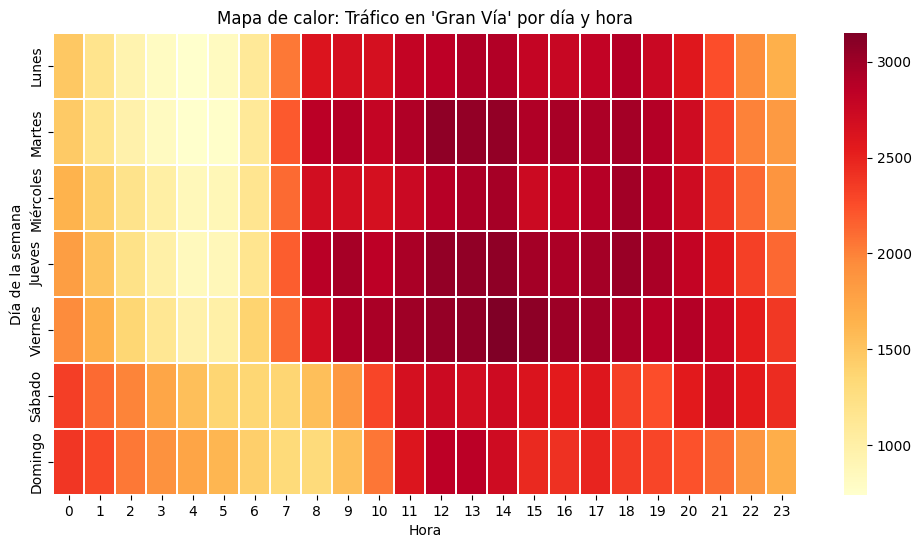

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def heatmap_calle(df, nombre_calle):
    """
    Dibuja un heatmap de tráfico por día y hora solo para las estaciones
    cuyo COL_NAME contiene 'nombre_calle'.
    
    df : pd.DataFrame → DataFrame final con columnas COL_NAME y tiempo
    nombre_calle : str → substring de la calle que quieres filtrar
    """
    # 1️⃣ Filtrar columnas de la calle
    columnas_calle = [col for col in df.columns if nombre_calle in col]
    columnas_necesarias = ["hora", "dia_semana", "fecha", "timestamp"]
    columnas_seleccionadas = columnas_calle + columnas_necesarias
    df_calle = df[columnas_seleccionadas]

    # 2️⃣ Sumar tráfico por fila solo para esas estaciones
    trafico_calle = df_calle.drop(columns=["hora","dia_semana","fecha","timestamp"]).sum(axis=1)

    # 3️⃣ Crear DataFrame para agrupar
    pivot = pd.DataFrame({
        "hora": df_calle["hora"],
        "dia_semana": df_calle["dia_semana"],
        "trafico": trafico_calle
    })

    # 4️⃣ Agrupar por día y hora, calcular promedio
    tabla = pivot.groupby(["dia_semana","hora"]).mean().reset_index()

    # 5️⃣ Reordenar días
    dias_orden = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]
    tabla["dia_semana"] = pd.Categorical(tabla["dia_semana"], categories=dias_orden, ordered=True)

    # 6️⃣ Pivotar para heatmap
    heatmap_data = tabla.pivot(index="dia_semana", columns="hora", values="trafico")

    # 7️⃣ Dibujar heatmap
    plt.figure(figsize=(12,6))
    sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.3, annot=False)
    plt.title(f"Mapa de calor: Tráfico en '{nombre_calle}' por día y hora")
    plt.ylabel("Día de la semana")
    plt.xlabel("Hora")
    plt.show()


# === Uso ===
heatmap_calle(df_final, "Gran Vía")
